<a href="https://colab.research.google.com/github/sampulcini/emendas/blob/main/analise_emendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O intuito dessa análise é identificar se existe um aumento de Repasses aos Municipios de Emendas Parlamentares em período eleitoral

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar arquivo csv do Dicionario
dicionario = pd.concat(
    [pd.read_csv(file, encoding='latin1', delimiter=';', on_bad_lines='skip') for file in ['dicionario.csv']],
    ignore_index=True
)

dicionario.head(18)

,DESCRIÇÃO,DETALHAMENTO
0,Código da Emenda,Identificação única atribuída à emenda para fa...
1,Ano da Emenda,Ano em que a emenda foi proposta ou aprovada.
2,Tipo de Emenda,"Classificação da emenda (por exemplo, emenda p..."
3,Código do Autor da Emenda,Identificação única do legislador ou entidade ...
4,Nome do Autor da Emenda,Nome do legislador ou entidade responsável pel...
5,Número da emenda,Sequência numérica que identifica a emenda den...
6,Localidade do gasto,Região ou município onde os recursos da emenda...
7,Código Função,Região ou município onde os recursos da emenda...
8,Nome Função,Nome da função do governo correspondente ao có...
9,Código Subfunção,Código que detalha a subárea dentro da função ...


In [ ]:
import pandas as pd

# Carregar arquivo csv das Emendas de 2014 até 2024 Setembro com low_memory=False
emendas = pd.concat(
    [pd.read_csv(file, encoding='latin1', delimiter=';', on_bad_lines='skip', low_memory=False) for file in ['Emendas.csv']],
    ignore_index=True
)

# Renomear as colunas para letras minúsculas
emendas.columns = emendas.columns.str.lower()

# Dicionário para renomear as colunas
dicionario_renomeacao = {
    'ano da emenda': 'ano',
    'tipo de emenda': 'tipo',
    'autor da emenda': 'autor',
    'número da emenda': 'numero',
    'localidade do gasto': 'localidade_gasto',
    'código função': 'codigo_funcao',
    'nome função': 'nome_funcao',
    'código subfunção': 'codigo_subfuncao',
    'nome subfunção': 'nome_subfuncao',
    'valor empenhado': 'valor_empenhado',
    'valor liquidado': 'valor_liquidado',
    'valor pago': 'valor_pago',
    'valor restos a pagar inscritos': 'restos_a_pagar_inscritos',
    'valor restos a pagar cancelados': 'restos_a_pagar_cancelados',
    'valor restos a pagar pagos': 'restos_a_pagar_pagos'
}

# Renomeando as colunas
emendas.rename(columns=dicionario_renomeacao, inplace=True)

# Tratando dados para fazer a filtragem por estados

In [ ]:
# Extrair o estado dos últimos 2 caracteres do texto da coluna localidade_gasto
emendas['estado_destino'] = emendas['localidade_gasto'].str.extract(r'(\w{2})$')
emendas['localidade_gasto'].fillna('', inplace=True)  # Substituir nulos por string vazia

# Filtrando e tratando informações que não queremos utilziar
emendas_filtradas = emendas[~emendas['localidade_gasto'].str.contains('Nacional', case=False)]
entradas_invalidas = ['nacional', 'ul', 'or', 'te', 'nordeste', 'centro-oeste', 'sudeste', 'sul', 'exterior', 'norte', 'múltiplo']
emendas_filtradas = emendas_filtradas[~emendas_filtradas['localidade_gasto'].str.contains('|'.join(entradas_invalidas), case=False)]

# Agrupar por ano e estado e contar o número de emendas
contagem_emendas = emendas_filtradas.groupby(['ano', 'estado_destino']).size().reset_index(name='quantidade_emendas')
quantidade_total_por_estado = contagem_emendas.groupby('estado_destino')['quantidade_emendas'].sum().reset_index()
quantidade_total_por_estado = quantidade_total_por_estado.sort_values(by='quantidade_emendas', ascending=False)

quantidade_total_por_estado.head(30)


<ipython-input-43-fee260005df6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  emendas['localidade_gasto'].fillna('', inplace=True)  # Substituir nulos por string vazia


,estado_destino,quantidade_emendas
18,RJ,2531
25,SP,1777
4,BA,943
5,CE,794
10,MG,745
15,PE,724
14,PB,626
17,PR,614
9,MA,551
22,RS,446


# Criando gráfico de para facilitar a visualização da relação de Relevancia de cada Estado

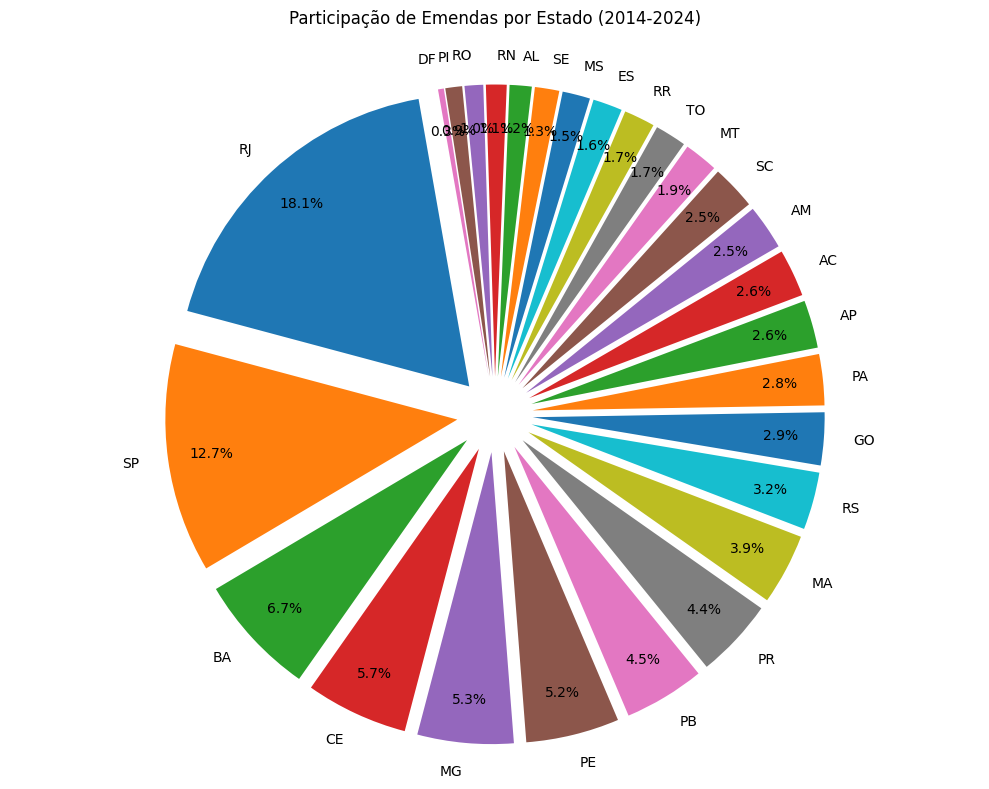

In [ ]:
# Criar gráfico de Participação de Emendas por Estado
plt.figure(figsize=(10, 8))
explode = [0.13] * len(quantidade_total_por_estado)  # Separação das fatias
plt.pie(quantidade_total_por_estado['quantidade_emendas'],
        labels=quantidade_total_por_estado['estado_destino'],
        autopct='%1.1f%%',
        startangle=100,
        explode=explode,
        pctdistance=0.85)

plt.title('Participação de Emendas por Estado (2014-2024)', pad=20)
plt.axis('equal')  # Para manter o gráfico circular
plt.tight_layout()
plt.show()


# Gráficos de 2014 até 2024 por Estado

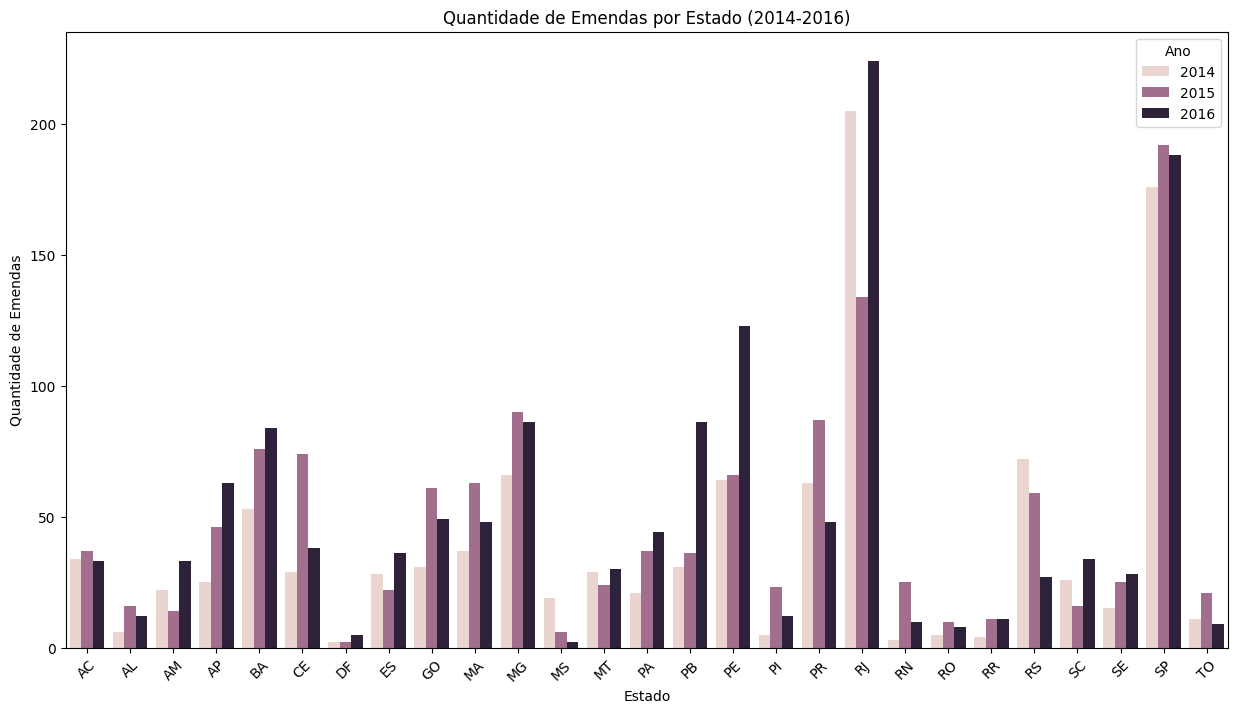

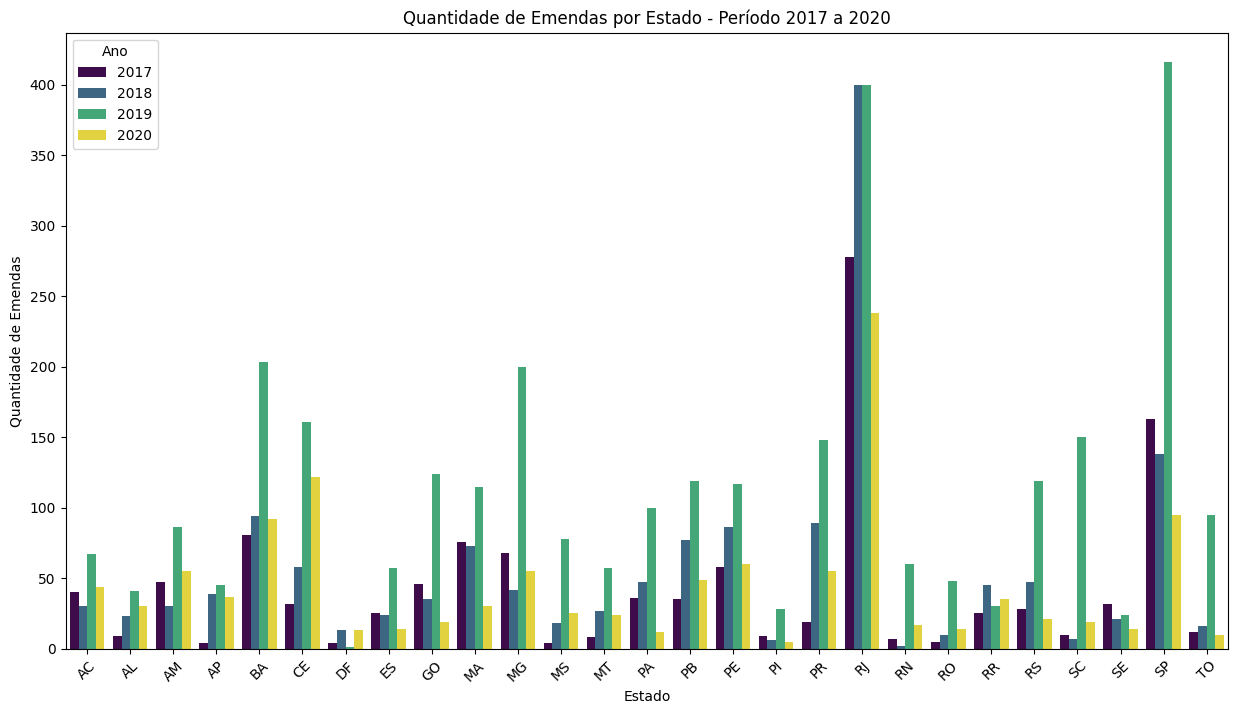

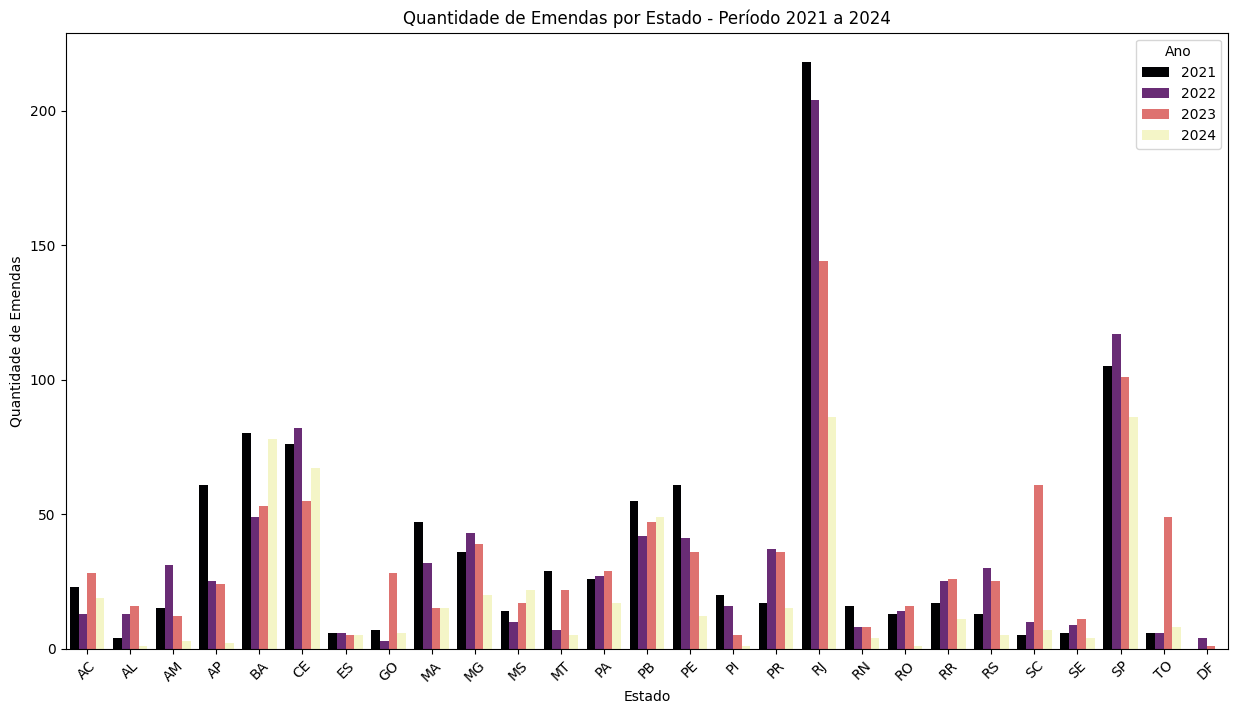

In [ ]:
# Filtrar dados para o período de 2014 a 2016
dados_2014_2016 = contagem_emendas[(contagem_emendas['ano'] >= 2014) & (contagem_emendas['ano'] <= 2016)]

# Plotar gráfico de barras para o período de 2014 a 2016
plt.figure(figsize=(15, 8))
sns.barplot(data=dados_2014_2016, x='estado_destino', y='quantidade_emendas', hue='ano')

plt.title('Quantidade de Emendas por Estado (2014-2016)')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Emendas')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.show()

# Gráfico para o período de 2017 a 2020
emendas_2017_2020 = contagem_emendas[(contagem_emendas['ano'] >= 2017) & (contagem_emendas['ano'] <= 2020)]

plt.figure(figsize=(15, 8))
sns.barplot(data=emendas_2017_2020, x='estado_destino', y='quantidade_emendas', hue='ano', palette='viridis')
plt.title('Quantidade de Emendas por Estado - Período 2017 a 2020')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Emendas')
plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.show()

# Gráfico para o período de 2021 a 2024
emendas_2021_2024 = contagem_emendas[(contagem_emendas['ano'] >= 2021) & (contagem_emendas['ano'] <= 2024)]

plt.figure(figsize=(15, 8))
sns.barplot(data=emendas_2021_2024, x='estado_destino', y='quantidade_emendas', hue='ano', palette='magma')
plt.title('Quantidade de Emendas por Estado - Período 2021 a 2024')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Emendas')
plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.show()

# Gráfico final

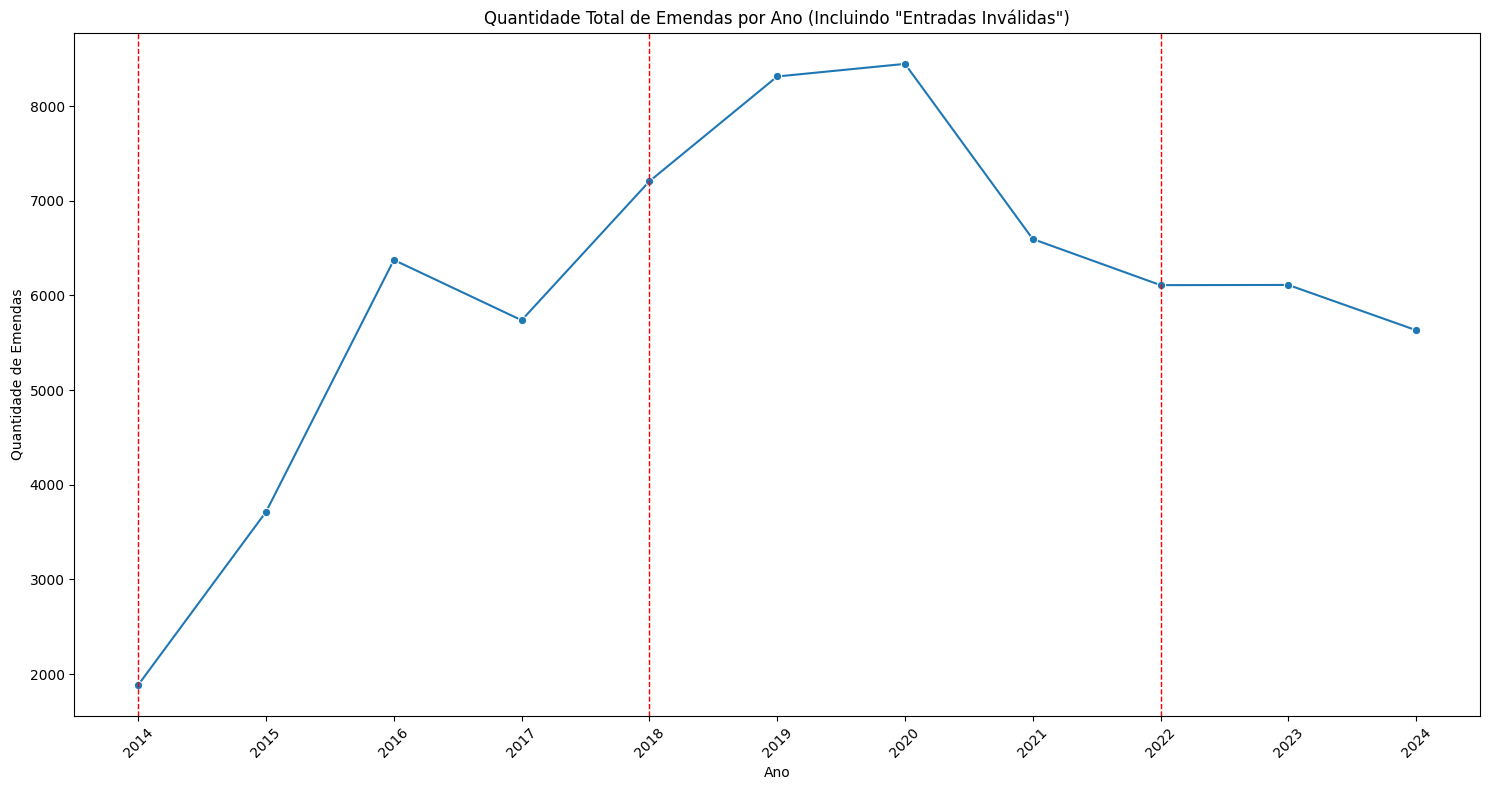

In [ ]:
# Criando gráfico final
quantidade_emendas_por_ano = emendas.groupby('ano').size().reset_index(name='quantidade_emendas')
plt.figure(figsize=(15, 8))
sns.lineplot(data=quantidade_emendas_por_ano, x='ano', y='quantidade_emendas', marker='o')

# Demarcadores visuais para os anos eleitorais
anos_eleitorais = [2014, 2018, 2022]
for ano in anos_eleitorais:
    plt.axvline(x=ano, color='red', linestyle='--', linewidth=1)

plt.title('Quantidade Total de Emendas por Ano (Incluindo "Entradas Inválidas")')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Emendas')
plt.xticks(range(2014, 2025), rotation=45)
plt.tight_layout()
plt.show()
